#### Importing the dependancies needed

In [1]:
import urllib.request
import cv2
import numpy as np
from sklearn.cluster import KMeans
import os
import math
import matplotlib.pyplot as plt
%matplotlib inline

#### Downloading the image through a url and correcting it to display along with the size

Original size of butterfly image is: 1008 Kilo Bytes


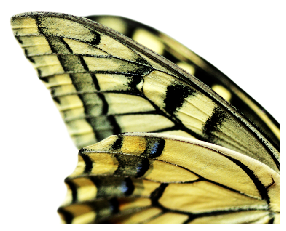

In [2]:
butterfly_image_url = "http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Dataset/butterfly.png"
urllib.request.urlretrieve(butterfly_image_url, "butterfly.png") # downloads file as "butterfly.png"
im = cv2.imread("butterfly.png")
butterfly_im_corrected = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(butterfly_im_corrected)
print("Original size of butterfly image is: {} Kilo Bytes".format(str(math.ceil((os.stat('butterfly.png').st_size)/1000))))

#### Extracting num_rows and num_cols from image (stored in im variable)

In [3]:
num_rows = im.shape[0]
num_cols = im.shape[1]
transform_image_for_KMeans = im.reshape(num_rows * num_cols, 3)

### Perform KMeans to compress image, here K = 8 clusters

In [4]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(transform_image_for_KMeans)

cluster_centroids = np.asarray(kmeans.cluster_centers_,dtype=np.uint8) 

# labels represent the label of each pixel and which cluster it belongs to
labels = np.asarray(kmeans.labels_,dtype=np.uint8 )  
labels = labels.reshape(num_rows,num_cols);

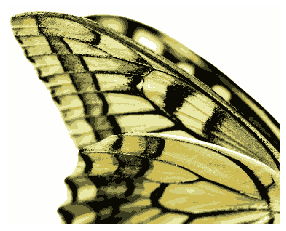

In [5]:
compressed_image = np.ones((num_rows, num_cols, 3), dtype=np.uint8)
for r in range(num_rows):
    for c in range(num_cols):
        compressed_image[r, c, :] = cluster_centroids[labels[r, c], :]

cv2.imwrite("compressed_image.png", compressed_image)
compressed_im = cv2.imread("compressed_image.png")
compressed_im_corrected = cv2.cvtColor(compressed_im, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(compressed_im_corrected)

In [6]:
print("Compressed size of image is: {} Kilo Bytes".format(str(math.ceil((os.stat('compressed_image.png').st_size)/1000))))

Compressed size of image is: 143 Kilo Bytes


### Achieved a size compression of 85.3175% using 8 clusters

### Perform KMeans to compress image, here K = 4 clusters


In [7]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(transform_image_for_KMeans)

cluster_centroids = np.asarray(kmeans.cluster_centers_,dtype=np.uint8) 

# labels represent the label of each pixel and which cluster it belongs to
labels = np.asarray(kmeans.labels_,dtype=np.uint8 )  
labels = labels.reshape(num_rows,num_cols);

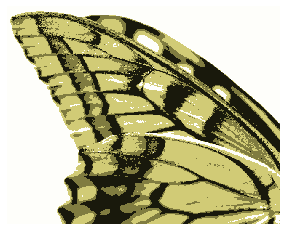

In [8]:
compressed_image = np.ones((num_rows, num_cols, 3), dtype=np.uint8)
for r in range(num_rows):
    for c in range(num_cols):
        compressed_image[r, c, :] = cluster_centroids[labels[r, c], :]

cv2.imwrite("compressed_image.png", compressed_image)
compressed_im = cv2.imread("compressed_image.png")
compressed_im_corrected = cv2.cvtColor(compressed_im, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(compressed_im_corrected)

In [9]:
print("Compressed size of image is: {} Kilo Bytes".format(str(math.ceil((os.stat('compressed_image.png').st_size)/1000))))

Compressed size of image is: 66 Kilo Bytes


### Achieved a size compression of 93.6508% using 4 clusters

### Perform KMeans to compress image, here K = 2 clusters

In [10]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(transform_image_for_KMeans)

cluster_centroids = np.asarray(kmeans.cluster_centers_,dtype=np.uint8) 

# labels represent the label of each pixel and which cluster it belongs to
labels = np.asarray(kmeans.labels_,dtype=np.uint8 )  
labels = labels.reshape(num_rows,num_cols);

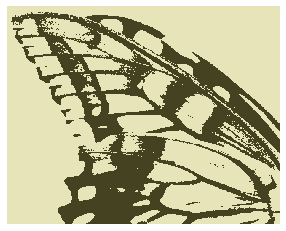

In [11]:
compressed_image = np.ones((num_rows, num_cols, 3), dtype=np.uint8)
for r in range(num_rows):
    for c in range(num_cols):
        compressed_image[r, c, :] = cluster_centroids[labels[r, c], :]

cv2.imwrite("compressed_image.png", compressed_image)
compressed_im = cv2.imread("compressed_image.png")
compressed_im_corrected = cv2.cvtColor(compressed_im, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(compressed_im_corrected)

In [12]:
print("Compressed size of image is: {} Kilo Bytes".format(str(math.ceil((os.stat('compressed_image.png').st_size)/1000))))

Compressed size of image is: 31 Kilo Bytes


### Achieved a size compression of 96.9246% using 2 clusters